<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تمرین کراس
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم به بهانه‌ی حل مسئله‌ی تشخیص سرطان سینه به کمک یک شبکه‌ی عصبی عمیق، نحوه‌ی کار با <code>keras</code> را تمرین کنیم.
مجموعه‌داده‌ی این تمرین در ارتباط با ویژگی‌های استخراج شده از توده‌های سرطانی موجود در سینه‌ی چند بیمار بوده است. برخی ویژگی‌ها از تصاویر دیجیتالی به دست آمده‌اند که خصوصیات هسته‌های سلولی موجود در تصویرهای مذکور را توصیف می‌کنند. هدف این تمرین ساخت یک مدل یادگیری عمیق برای تشخیص خوش‌خیم یا بدخیم بودن سرطان افراد بر اساس ویژگی‌های فوق است.
</font>
</p>


In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv(r'data.csv')

In [66]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته به‌ازای هر داده‌ای که ثبت شده نوع سرطان آن در ستون <code>diagnosis</code> نوشته شده است. دو وضعیت موجود در این ستون عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| مقدار | نوع سرطان |
| :---: | :---: |
| <code>M</code> | بدخیم |
| <code>B</code> | خوش‌خیم |

</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا داده‌ها را از فایل <code>data</code> موجود در پوشه بخوانید.
سپس باید ستون (<code>Unnamed: 32</code>) را حذف کنید. همچنین می‌توانید ستون <code>id</code> را نیز حذف کنید.
</font>
</p>


In [67]:
df = df.drop(columns=['Unnamed: 32'])
df = df.drop(columns=['id'])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین قدم پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید. به‌عنوان مثال بررسی این‌که کدام ویژگی‌ها همبستگی بیشتری با نتیجه/هدف/برچسب دارند و این‌که آیا داده‌ها از منظر ستون هدف/برچسب متوازن است و مانند آن.
حداقل چهار گزارش از داده‌های موجود ارائه دهید.
نیازی به گزارش‌های پیچیده نیست و اگر کمک به فهم بهتر از داده‌ها کند مورد قبول است.
</font>
</p>

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Summary statistics :

In [69]:
summary_stats = df.describe()
summary_stats

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Distribution for diagnosis column :

In [70]:
class_distribution = df['diagnosis'].value_counts()
print("Class Distribution:")
class_distribution

Class Distribution:


diagnosis
B    357
M    212
Name: count, dtype: int64

Correlation matrix as a heat map (between the 4 columns i thought would help with the understanding of the data):

<Axes: >

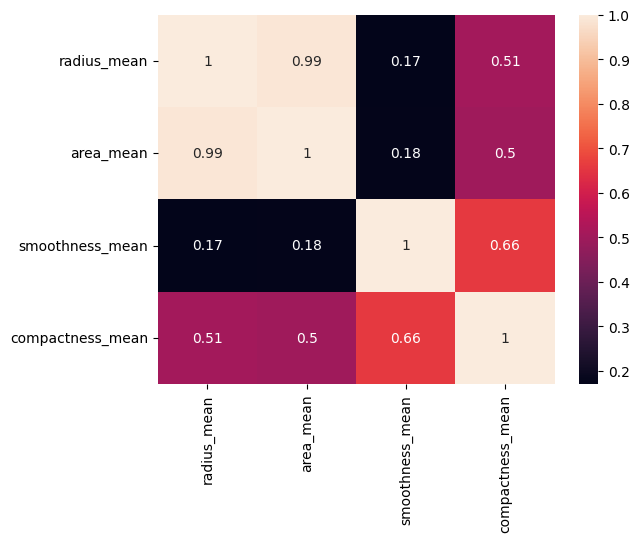

In [71]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
temp = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
correlation_matrix = df[temp].corr()
sns.heatmap(correlation_matrix, annot=True)

Dirstribution of radius mean :

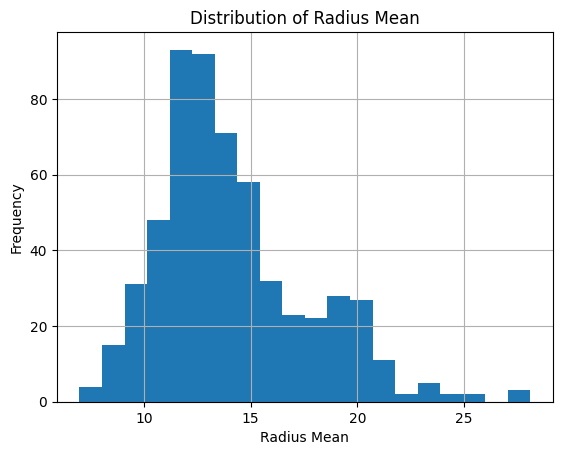

In [72]:
df['radius_mean'].hist(bins=20)
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Radius Mean')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌پردازش داده‌ها</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به سراغ آماده‌سازی داده‌ها برای مدل‌سازی برویم.. 
<br>
داده‌ها را به دو مجموعه‌ی آموزشی (<code>train</code>) و آزمون (<code>test</code>) جدا کنید. بدین منظور ۲۰ درصد داده‌ها را برای آزمون در نظر بگیرید و <code>random_state=42</code> قرار دهید. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
هم‌چنین داده‌های دسته‌ای (categorical) را کذگذاری (encode) کنید.
<br>
تصمیم‌گیری استفاده از تکنیک‌های دیگر همچون نرمال‌سازی بر عهده‌ی خودتان است.
</font>
</p>

In [73]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'] 

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (455, 30)
X_test shape:  (114, 30)
y_train shape:  (455,)
y_test shape:  (114,)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌توانید با استفاده از الگوریتم‌های یادگیری عمیق مدلی آموزش دهید که بر اساس مقادیر ویژگی‌های موجود، نوع سرطان را پیش‌بینی کند.
در این قسمت از شما می‌خواهیم به دو صورت <code>Sequential</code> و <code>Functional</code> مدلی طراحی کنید و آن‌ها را با هم قیاس کنید تا با تفاوت روش‌های مختلف ساخت مدل در کراس آشنا شوید.
برای مطالعه و مشاهده‌ی بیشتر تفاوت این دو نوع مدل به <a href="https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10">این لینک</a>  یا <a href="https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/">این لینک</a> می‌توانید نگاه کنید.
<br>
 تابع هزینه (<code>loss</code>) و بهینه‌ساز (<code>optimizer</code>) را براساس تشخیص خود، انتخاب کنید. 
    
</font>
</p>

In [75]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L2

In [76]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Sequential</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نیاز است به کمک روش <code>Sequential</code> مدل زیر را پیاده کنید. در صورتی‌که قصد بررسی ساختار مدل خود و ترسیم شکلی همچون شکل زیر دارید می‌توانید از تابع <code>keras.utils.plot_model</code> کمک بگیرید (برای اطلاعات بیشتر <a href="https://keras.io/api/utils/model_plotting_utils/">این لینک</a> را مطالعه کنید).
<br>
تعداد نورون‌های هر لایه و تابع فعال‌ساز آن در شکل قابل مشاهده است. سایر اطلاعات مورد نیاز عبارتند از:
<ul dir=rtl>
<li>
لایه‌های <code>Dense_2</code>، <code>Dense_4</code> و <code>Output</code> با روش <code>GlorotNormal</code> مقداردهی اولیه شوند.
</li>
<li>
لایه‌های <code>Dense_3</code> و <code>Dense_3</code> با روش <code>HeNormal</code> مقداردهی اولیه شوند.
</li>
<li>
احتمال Dropout را در <code>Dropout_1</code> و <code>Dropout_2</code> برابر <code>0.2</code> قرار دهید.
</li>
<li>
احتمال Dropout را در <code>Dropout_3</code>، <code>Dropout_4</code> و <code>Dropout_5</code> برابر <code>0.3</code> قرار دهید.
</li>
<li>
برای لایه‌های <code>Dense_2</code> تا <code>Dense_5</code> و همچنین لایه‌ی <code>Output</code> از رگولاریزیشن <code>L2</code> استفاده کنید و مقدار ضریب آن را <code>0.02</code> قرار دهید.
</ul>
    
</font>
</p>

<center>
<div style="max-width:600px">
<img src="sequential_model.png" >
</div>
</center>

In [77]:
model = Sequential()

model.add(Dense(40, activation='relu', input_shape=(30,), kernel_initializer=GlorotNormal(), name='Dense_1'))
model.add(Dropout(0.2, name='Dropout_1'))

model.add(Dense(30, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_2'))
model.add(Dropout(0.3, name='Dropout_2'))
model.add(Dense(15, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_3'))
model.add(Dropout(0.3, name='Dropout_3'))
model.add(Dense(10, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_4'))
model.add(Dropout(0.3, name='Dropout_4'))
model.add(Dense(5, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_5'))
model.add(Dropout(0.3, name='Dropout_5'))

model.add(Dense(1, activation='sigmoid', kernel_regularizer=L2(0.02), name='Output'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 40)                1240      
                                                                 
 Dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 Dense_2 (Dense)             (None, 30)                1230      
                                                                 
 Dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 Dense_3 (Dense)             (None, 15)                465       
                                                                 
 Dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 Dense_4 (Dense)             (None, 10)               

In [78]:
from keras.utils import plot_model

keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='ans_sequential_model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای ۲۰۰ دور و با اندازه‌ی دسته (batch) معادل ۳۲ آموزش دهید. همچنین بُر زدن (shuffle) داده‌ها را فعال کنید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [79]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

Epoch 1/200


12/12 [==============================] - 1s 13ms/step - loss: 3.2551 - accuracy: 0.5220 - val_loss: 3.0169 - val_accuracy: 0.5604
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 3.0224 - accuracy: 0.5192 - val_loss: 2.8725 - val_accuracy: 0.7912
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 2.8734 - accuracy: 0.6291 - val_loss: 2.7522 - val_accuracy: 0.8462
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 2.7809 - accuracy: 0.6319 - val_loss: 2.6371 - val_accuracy: 0.8462
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 2.6518 - accuracy: 0.7143 - val_loss: 2.5278 - val_accuracy: 0.8901
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 2.5337 - accuracy: 0.7390 - val_loss: 2.4241 - val_accuracy: 0.9231
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 2.4220 - accuracy: 0.7445 - val_loss: 2.3232 - val_accuracy: 0.9231
Epoch 8/200
12/12 [=====

In [80]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


 1/15 [=>............................] - ETA: 0s - loss: 0.1582 - accuracy: 1.0000

15/15 [==============================] - 0s 967us/step - loss: 0.1889 - accuracy: 0.9868
Train Loss: 0.1889, Train Accuracy: 0.9868
4/4 [==============================] - 0s 1ms/step - loss: 0.2105 - accuracy: 0.9737
Test Loss: 0.2105, Test Accuracy: 0.9737


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Functional</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مدل‌سازی به این روش دست شما را برای طراحی‌های آزادانه‌تر و پیچیده‌تر باز می ‌گذارد. به‌عنوان مثال می‌توانید شاخه‌های مختلفی در مدل خود ایجاد کنید. در این قسمت مدلی که در تصویر زیر مشاهده می‌کنید را پیاده‌سازی کنید. شاخه‌ی سمت چپ مدل دقیقاْ مشابه با مدل قبلی است ولی شاخه‌ی سمت راست مدل همان ورودی است که با خروجی شاخه‌ی سمت چپ ادغام شده است. برای ادغام از تابع <code>keras.layers.concatenate</code> استفاده کنید.
    
</font>
</p>

<center>
<div style="max-width:600px">
<img src="functional_model.png" >
</div>
</center>

In [81]:
input_layer = Input(shape=(30,), name='Input')

shared_branch = Dense(40, activation='relu', kernel_initializer=GlorotNormal(), name='Dense_1')(input_layer)
shared_branch = Dropout(0.2, name='Dropout_1')(shared_branch)
shared_branch = Dense(30, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_2')(shared_branch)
shared_branch = Dropout(0.3, name='Dropout_2')(shared_branch)
shared_branch = Dense(15, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_3')(shared_branch)
shared_branch = Dropout(0.3, name='Dropout_3')(shared_branch)
shared_branch = Dense(10, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_4')(shared_branch)
shared_branch = Dropout(0.3, name='Dropout_4')(shared_branch)
shared_branch = Dense(5, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=L2(0.02), name='Dense_5')(shared_branch)
shared_branch = Dropout(0.3, name='Dropout_5')(shared_branch)

right_branch = input_layer

combined = concatenate([shared_branch, right_branch], name='Concatenate')

output_layer = Dense(1, activation='sigmoid', kernel_regularizer=L2(0.02), name='Output')(combined)

model_f = Model(inputs=input_layer, outputs=output_layer)
model_f.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_f.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 30)]                 0         []                            
                                                                                                  
 Dense_1 (Dense)             (None, 40)                   1240      ['Input[0][0]']               
                                                                                                  
 Dropout_1 (Dropout)         (None, 40)                   0         ['Dense_1[0][0]']             
                                                                                                  
 Dense_2 (Dense)             (None, 30)                   1230      ['Dropout_1[0][0]']           
                                                                                            

 Dropout_5 (Dropout)         (None, 5)                    0         ['Dense_5[0][0]']             
                                                                                                  
 Concatenate (Concatenate)   (None, 35)                   0         ['Dropout_5[0][0]',           
                                                                     'Input[0][0]']               
                                                                                                  
 Output (Dense)              (None, 1)                    36        ['Concatenate[0][0]']         
                                                                                                  
Total params: 3186 (12.45 KB)
Trainable params: 3186 (12.45 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [82]:
keras.utils.plot_model(model_f, show_shapes=True, show_layer_activations=True, to_file='ans_functional_model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای ۲۰۰ دور و با اندازه‌ی دسته (batch) معادل ۳۲ آموزش دهید. همچنین بُر زدن (shuffle) داده‌ها را فعال کنید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [83]:
model.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True, validation_split=0.2)

train_loss, train_accuracy = model_f.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model_f.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1974 - accuracy: 0.9688

12/12 [==============================] - 0s 6ms/step - loss: 0.2185 - accuracy: 0.9725 - val_loss: 0.2198 - val_accuracy: 0.9780
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9780 - val_loss: 0.2190 - val_accuracy: 0.9890
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9753 - val_loss: 0.2187 - val_accuracy: 0.9780
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.9753 - val_loss: 0.2201 - val_accuracy: 0.9780
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9808 - val_loss: 0.2214 - val_accuracy: 0.9670
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.9835 - val_loss: 0.2208 - val_accuracy: 0.9670
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9808 - val_loss: 0.2199 - val_accuracy: 0.9780
Epoch 8/200
12/12 [======

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی مدل‌ها به همراه رسم نمودار</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی دقت عملکرد مدل‌هایی که ساخته‌اید، <code>confusion matrix</code> را رسم کنید. در ادامه نمودارهای <code>accuracy</code> بر اساس <code>epoch</code> و <code>loss</code> بر حسب <code>epoch</code> را نیز رسم کنید.
<br>
سلول‌های زیر جهت شفاف‌تر شدن و یکسان شدن تحلیل نتایج می‌باشد و فقط نام متغیرها را برای درست اجرا شدن تغییر دهید. دقت کنید که برای هر دو مدل باید اقدامات گفته شده را صورت دهید.
</font>
</p>

15/15 [==============================] - 0s 922us/step - loss: 0.1506 - accuracy: 0.9912
Train Loss: 0.1506, Train Accuracy: 0.9912
4/4 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9737
Test Loss: 0.1861, Test Accuracy: 0.9737
4/4 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



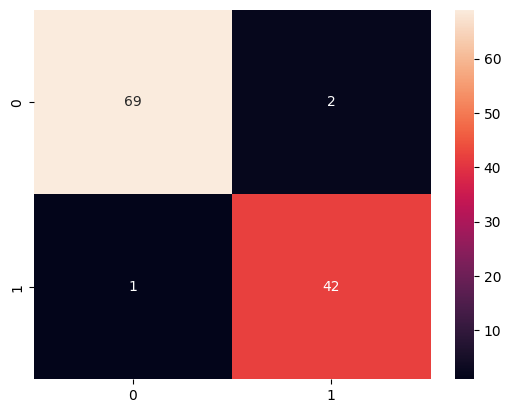

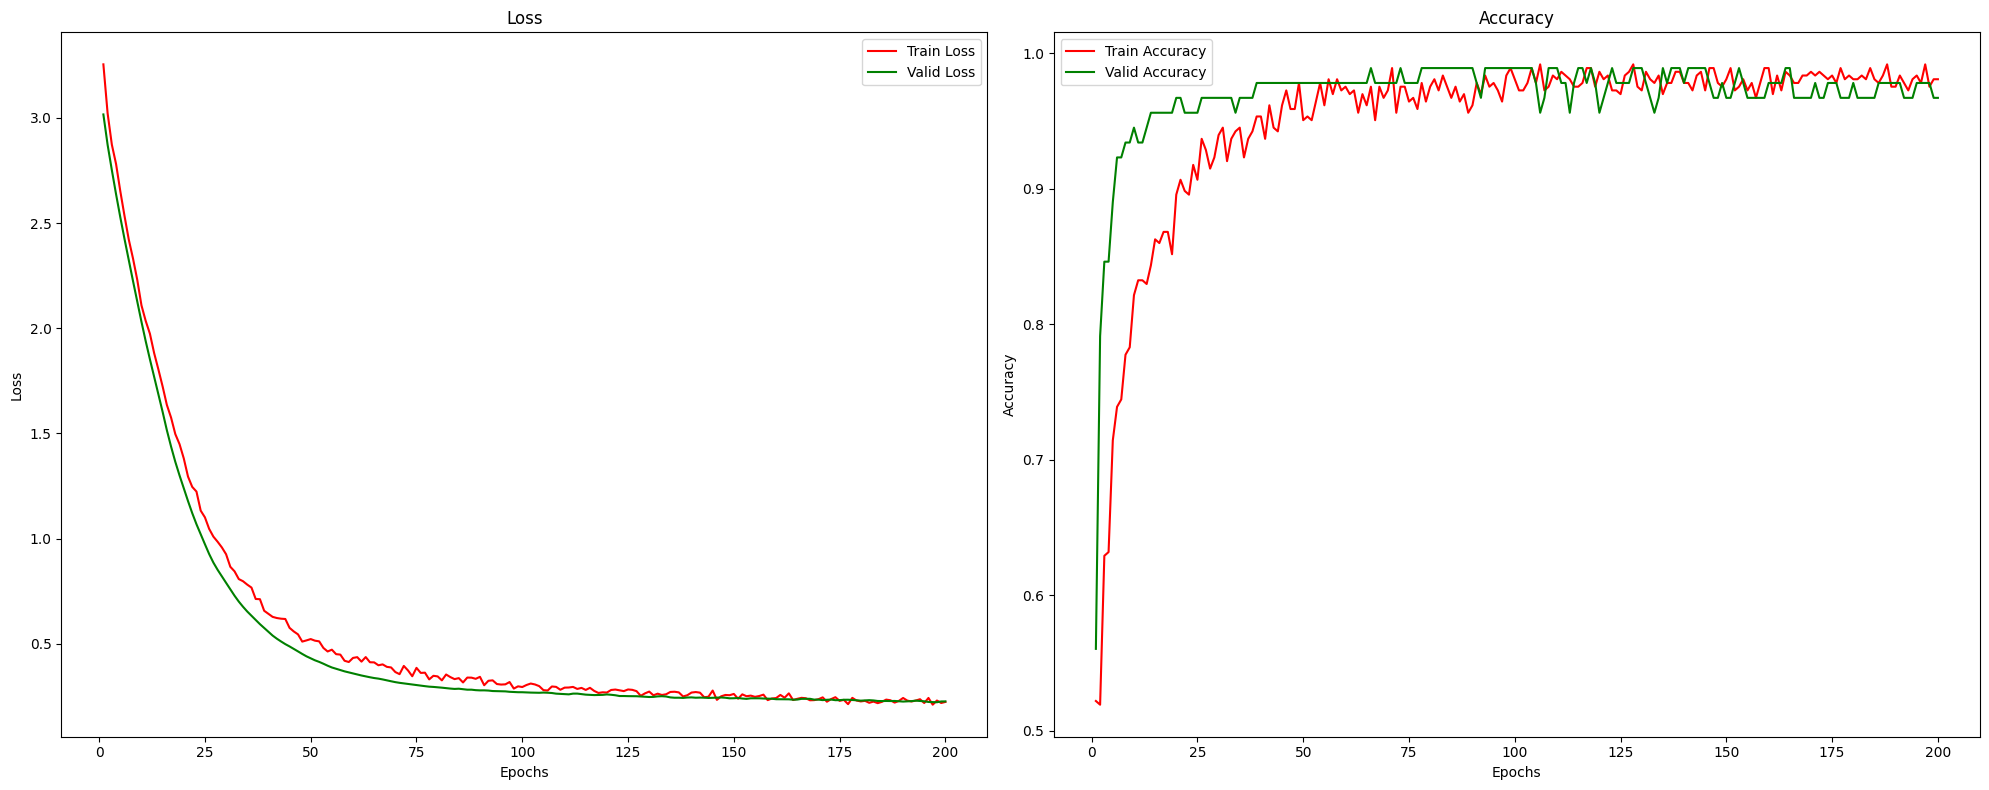

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

print(classification_report(y_test, y_pred))

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

15/15 [==============================] - 0s 2ms/step - loss: 4.0996 - accuracy: 0.3297
Train Loss: 4.0996, Train Accuracy: 0.3297
4/4 [==============================] - 0s 1ms/step - loss: 4.0541 - accuracy: 0.4386
Test Loss: 4.0541, Test Accuracy: 0.4386
4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.46      0.51        71
           1       0.31      0.40      0.35        43

    accuracy                           0.44       114
   macro avg       0.43      0.43      0.43       114
weighted avg       0.46      0.44      0.45       114



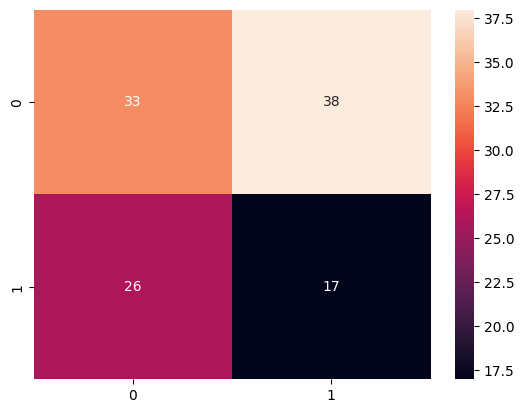

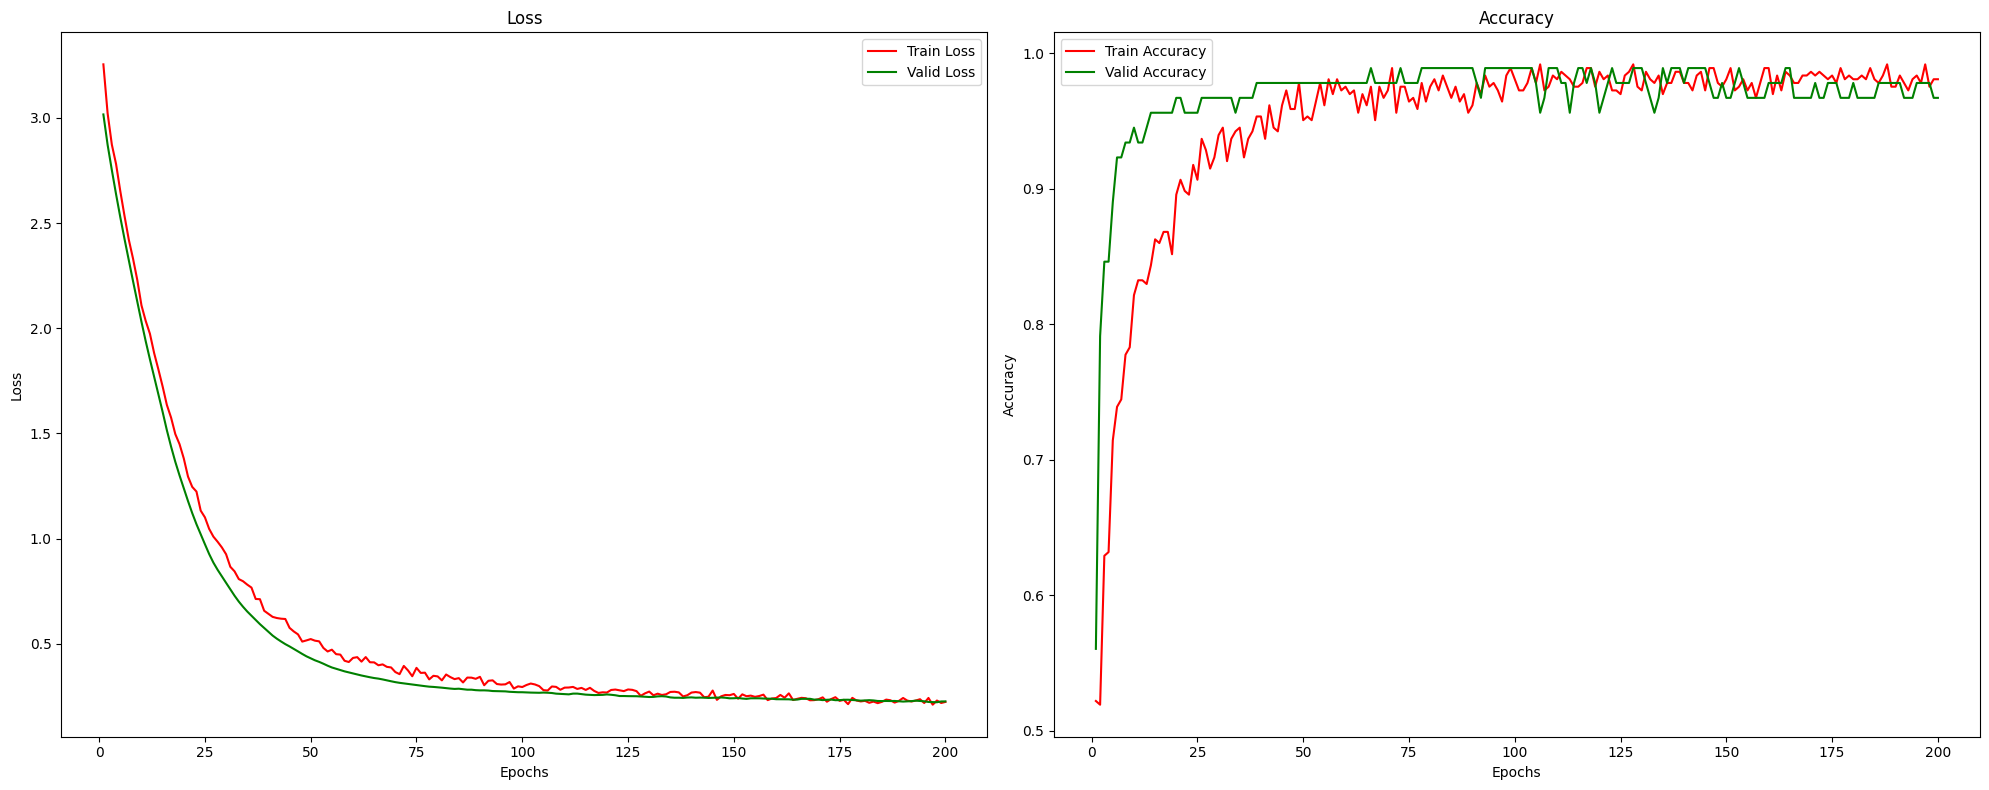

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model_f.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model_f.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

y_pred = model_f.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

print(classification_report(y_test, y_pred))

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()